In [12]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
60/60 [==============================] - 3s 36ms/step - loss: 0.1083 - val_loss: 0.1063
Epoch 2/20
60/60 [==============================] - 2s 38ms/step - loss: 0.1069 - val_loss: 0.1051
Epoch 3/20
60/60 [==============================] - 3s 52ms/step - loss: 0.1058 - val_loss: 0.1039
Epoch 4/20
60/60 [==============================] - 3s 43ms/step - loss: 0.1046 - val_loss: 0.1028
Epoch 5/20
60/60 [==============================] - 3s 43ms/step - loss: 0.1036 - val_loss: 0.1019
Epoch 6/20
60/60 [==============================] - 2s 37ms/step - loss: 0.1026 - val_loss: 0.1009
Epoch 7/20
60/60 [==============================] - 2s 38ms/step - loss: 0.1017 - val_loss: 0.1000
Epoch 8/20
60/60 [==============================] - 2s 38ms/step - loss: 0.1009 - val_loss: 0.0993
Epoch 9/20
60/60 [==============================] - 2s 40ms/step - loss: 0.1001 - val_loss: 0.0985
Epoch 10/20
60/60 [==============================] - 2s 38ms/step - loss: 0.0994 - val_loss: 0.0978
Epoch 11/

In [21]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

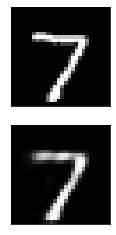

In [22]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=2000,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
30/30 [==============================] - 4s 94ms/step - loss: 0.4474 - val_loss: 0.2841
Epoch 2/100
30/30 [==============================] - 3s 101ms/step - loss: 0.2689 - val_loss: 0.2579
Epoch 3/100
30/30 [==============================] - 3s 99ms/step - loss: 0.2472 - val_loss: 0.2318
Epoch 4/100
30/30 [==============================] - 3s 105ms/step - loss: 0.2177 - val_loss: 0.1999
Epoch 5/100
30/30 [==============================] - 4s 126ms/step - loss: 0.1890 - val_loss: 0.1776
Epoch 6/100
30/30 [==============================] - 4s 130ms/step - loss: 0.1729 - val_loss: 0.1653
Epoch 7/100
30/30 [==============================] - 3s 100ms/step - loss: 0.1626 - val_loss: 0.1567
Epoch 8/100
30/30 [==============================] - 3s 113ms/step - loss: 0.1550 - val_loss: 0.1501
Epoch 9/100
30/30 [==============================] - 3s 104ms/step - loss: 0.1486 - val_loss: 0.1443
Epoch 10/100
30/30 [==============================] - 3s 96ms/step - loss: 0.1433 - val_loss:

KeyboardInterrupt: 